This Notebook Depicts Audio Classification Of Emergency Vehicle Sirens Based On The Dataset Created Which We Refer To As SireNNet.

# About Dataset
The dataset consists of wav-format audio files which are of length 3-seconds. They contain the siren sound of Emergency Vehicles - Police, Ambulance and Firetruck. A fourth category named Traffic also exists where it contains 3-second .wav format audio files of plain traffic sound. Each category contains 200 sound files.

# Importing Libraries

In [ ]:
#Audio Processing Libraries
import librosa
import librosa.display
from scipy import signal

#For Playing Audios
import IPython.display as ipd

#Array Processing
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Display the confusion matrix
from sklearn.metrics import confusion_matrix

#Deal with .pkl files
import pickle

#Create a dataframe
import pandas as pd

#Transform and encode the categorical targets
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#Split dataset
from sklearn.model_selection import train_test_split

import os

# Exploring Dataset

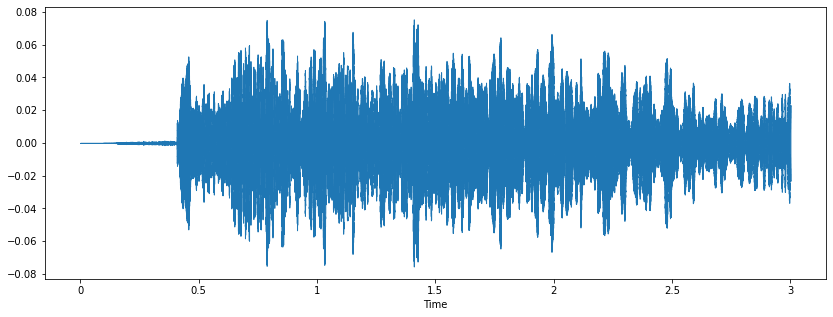

In [ ]:
# Ambulance

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/ambulance/sound_1.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

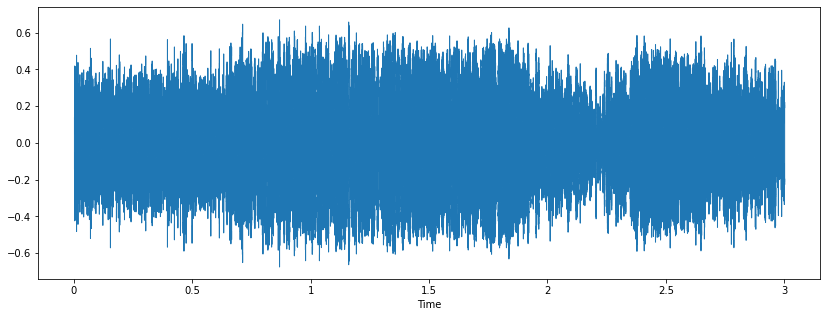

In [ ]:
# Firetruck

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/firetruck/sound_201.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

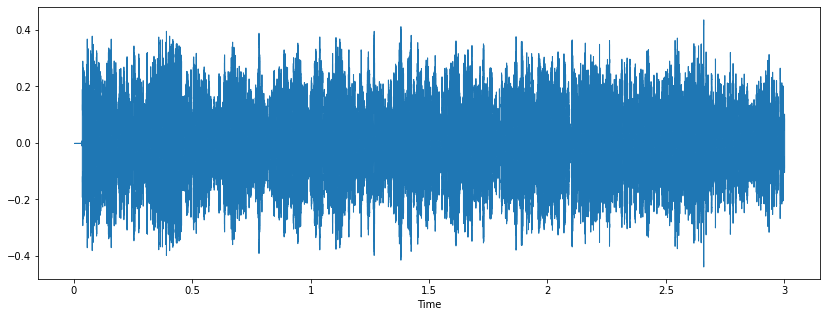

In [ ]:
# Police

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/police/sound_601.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

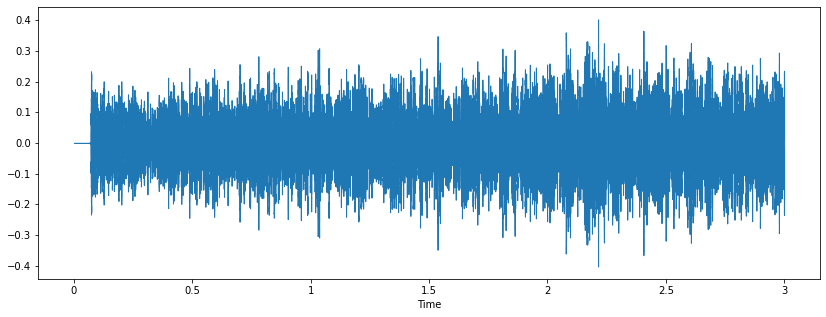

In [ ]:
# Traffic

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/traffic/sound_401.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

# Data Preprocessing

In [ ]:
# Using the function features_extractor to get a 80 MFCCs from each audio
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [ ]:
# Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients
audio_dataset_path = '/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/'

extracted_features = []
for path in os.listdir(audio_dataset_path):
    for file in os.listdir(audio_dataset_path+path+"/"):
        if file.lower().endswith(".wav"):
            file_name = audio_dataset_path+path+"/"+file
            data = features_extractor(file_name)
            extracted_features.append([data, path])

In [ ]:
# Save the data frame into a .pkl file
f = open('/content/drive/MyDrive/Audio_classification/sireNNet/Extracted_Features.pkl', 'wb')
pickle.dump(extracted_features, f)
f.close()

In [ ]:
#  Read the Extracted_Features from the .pkl file
f = open('/content/drive/MyDrive/Audio_classification/sireNNet/Extracted_Features.pkl', 'rb')
Data = pickle.load(f)
f.close()

In [ ]:
# Transform Data into a dataframe
df = pd.DataFrame(Data,columns=['feature','class'])
df.head()

,feature,class
0,"[-528.72516, 96.16885, -46.61265, -13.018279, ...",ambulance
1,"[-119.257904, 113.52823, -38.597782, -1.448590...",ambulance
2,"[-521.03015, 95.41537, -53.674095, -10.595257,...",ambulance
3,"[-38.631153, 104.40547, -40.990253, 1.8715612,...",ambulance
4,"[-164.9667, 126.782875, -35.10058, -14.790543,...",ambulance


In [ ]:
df['class'].value_counts()

police       227
ambulance    200
firetruck    200
traffic      200
Name: class, dtype: int64

In [ ]:
# Splitting the data into train and test sets
X = np.array(df['feature'].tolist())
Y = np.array(df['class'].tolist())

In [ ]:
X. shape

(827, 80)

In [ ]:
Y.shape

(827,)

In [ ]:
# Label Encoding
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [ ]:
Y[0]

'ambulance'

In [ ]:
y[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [ ]:
y_train.shape

(661, 4)

In [ ]:
# Display the shape of each splits
X_train.shape

(661, 80)

In [ ]:
X_test.shape

(166, 80)

In [ ]:
y_test.shape

(166, 4)

# Model Building

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
from sklearn import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [ ]:
# TO DO

'''
Try GridSearch on CNN Network to find best parameters and then train
'''

'\nTry GridSearch on CNN Network to find best parameters and then train\n'

In [ ]:
X_train_features  = X_train.reshape(len(X_train),-1,1)
X_test_features = X_test.reshape(len(X_test),-1,1)
print("Reshaped Array Size", X_train_features.shape)

Reshaped Array Size (661, 80, 1)


In [ ]:
X_train_features.shape

(661, 80, 1)

In [ ]:
X_train.shape

(661, 80)

In [ ]:
# set the window
window = 70
X = []
Y = []
for i in range(window,len(X_train)):
  X.append(X_train[i-window:i,:])
  Y.append(y_train[i])

In [ ]:
def lstm(optimizer="adam", dropout_rate=0.3):
    K.clear_session()
    inputs = Input(shape=(X_train_features.shape[1], X_train_features.shape[2]))

    #building network topology
    #model = Sequential()

    #First Conv1D layer
    lstm = LSTM(128, return_sequences = True)(inputs)
    lstm = Dropout(0.3)(lstm)

    #Time Distributed Layers
    lstm = TimeDistributed(Dense(256,activation='relu'))(lstm)
    lstm = TimeDistributed(Dense(512,activation='relu'))(lstm)

    #Flatten Layer
    lstm = Flatten()(lstm)

    #Dense Layer
    lstm = Dense(64, activation='relu')(lstm)
    lstm = Dense(y_test.shape[1], activation='softmax')(lstm)

    model = Model(inputs, lstm)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
model_lstm = lstm(optimizer="adam", dropout_rate=0)
model_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 80, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 80, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 80, 256)          33024     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 80, 512)          131584    
 tributed)                                                       
                                                                 
 flatten (Flatten)           (None, 40960)             0     

In [ ]:
# from keras.utils.vis_utils import plot_model
# plot_model(model_cnn, show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max',
                          patience = 10, restore_best_weights = True)

history = model_lstm.fit(X_train_features, y_train, epochs = 200,
                       callbacks = [early_stop],
                       batch_size = 64, validation_data = (X_test_features, y_test))

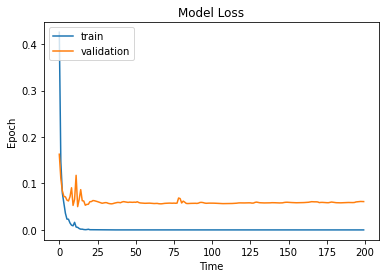

In [ ]:
# Summarize History for Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
_, acc = model_lstm.evaluate(X_test_features, y_test)
print("Test Accuracy : ", acc)

6/6 [==============================] - 1s 118ms/step - loss: 0.0610 - acc: 0.9880
Test Accuracy :  0.9879518151283264


6/6 [==============================] - 2s 119ms/step


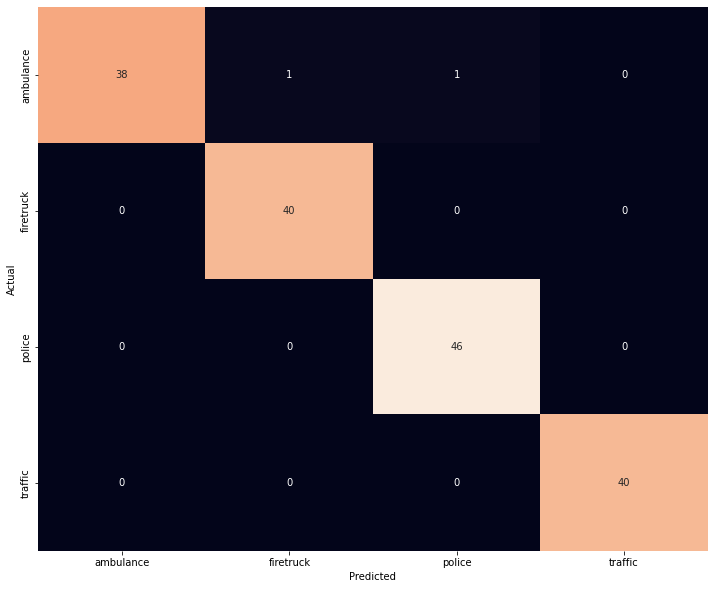

In [ ]:
y_pred = model_lstm.predict(X_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model_cnn.save('/content/drive/MyDrive/Audio_classification/sireNNet/LSTM_Model')